# Задание 1

Изучите результаты теста и сделайте вывод (проверяем гипотезу о равенстве средних). В качестве решения - ноутбук, в котором построено распределение параметра target в группах и проверены нужные критерии.

## Подготовка данных

In [6]:
import numpy as np

from scipy import stats
from statsmodels.stats import weightstats as stests

import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df = pd.read_csv('/content/94690722-cd6c-4eb4-8ad4-d506c1bb4d8b.csv')
print(df.columns.values)
print()
df.info()

['group' 'client_id' 'target']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   group      1998 non-null   object 
 1   client_id  1998 non-null   int64  
 2   target     1998 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [9]:
df

,group,client_id,target
0,test,1,48.294046
1,test,2,50.561098
2,test,3,50.987911
3,test,4,47.819840
4,test,5,50.153417
...,...,...,...
1993,control,1994,50.207788
1994,control,1995,51.715447
1995,control,1996,56.551077
1996,control,1997,47.178478


## Проверка на зависимость

In [15]:
# test and control groups
test = df[df.group == 'test'].target.to_numpy()
control = df[df.group == 'control'].target.to_numpy()

print("test size: " + str(test.shape) + " control size: " + str(control.shape))

test size: (1010,) control size: (988,)


In [16]:
# Is there any depencies?
df.client_id.unique().shape

(1998,)

Выборки независимы, поскольку число уникальных элементов равно общему числу элементов. 

## Проверка на нормальность

Построим графики распределения таргета по его частоте появления

No handles with labels found to put in legend.


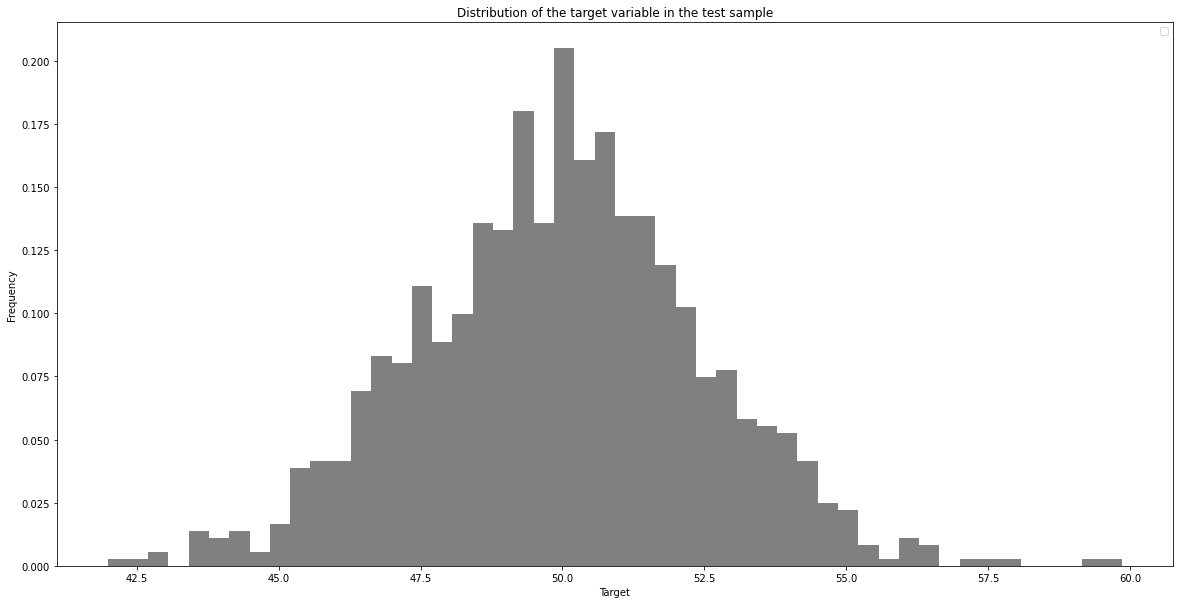

In [28]:
plt.figure(figsize=(20,10))
plt.hist(test, bins=50, density=True, color='gray')
plt.legend()
plt.title('Distribution of the target variable in the test sample')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

No handles with labels found to put in legend.


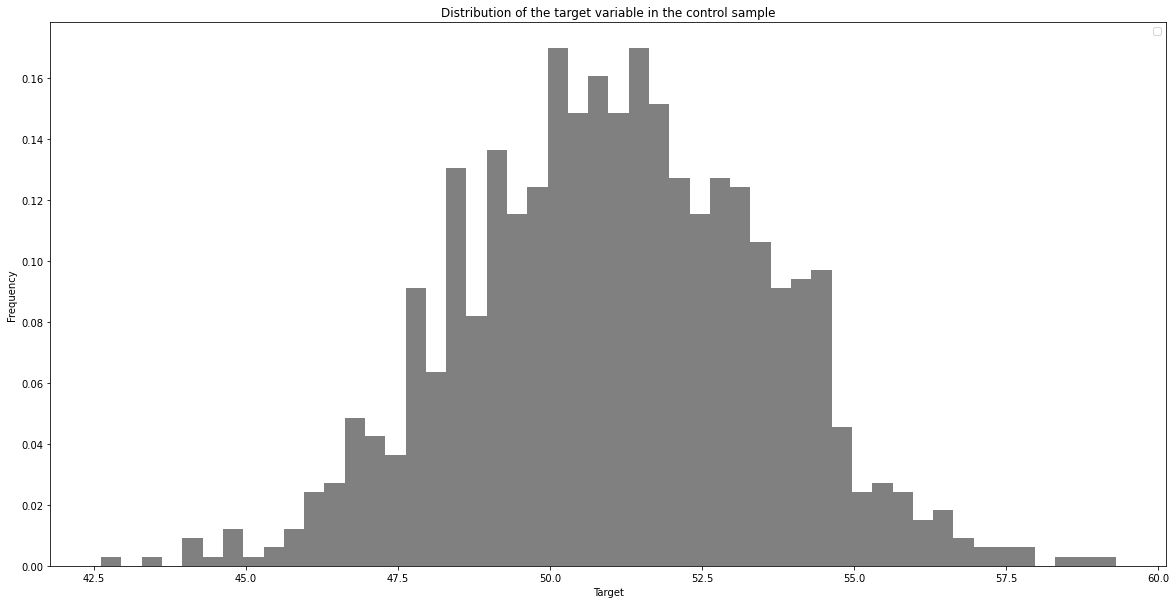

In [29]:
plt.figure(figsize=(20,10))
plt.hist(control, bins=50, density=True, color='gray')
plt.legend()
plt.title('Distribution of the target variable in the control sample')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

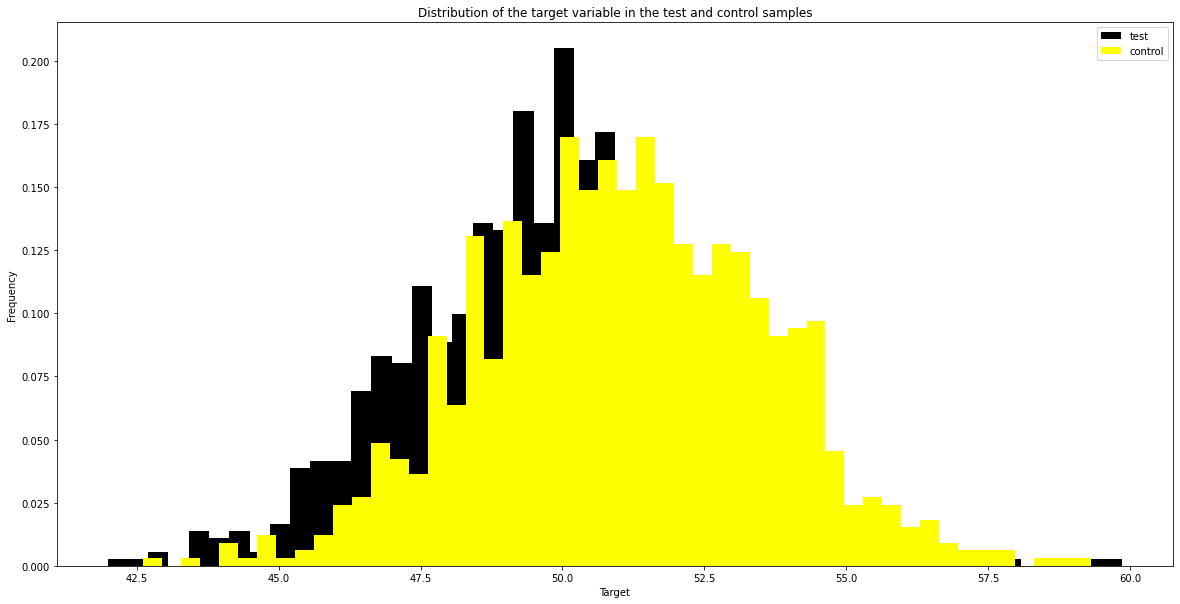

In [31]:
plt.figure(figsize=(20,10))
plt.hist(test, bins=50, density=True, color='black', label='test')
plt.hist(control, bins=50, density=True, color='yellow', label='control')
plt.legend()
plt.title('Distribution of the target variable in the test and control samples')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

Распределения близки к нормальным, есть смысл двигаться дальше

Проверим на нормлаьность с помощью построения Q-Q графика

Text(0.5, 1.0, 'Control sample')

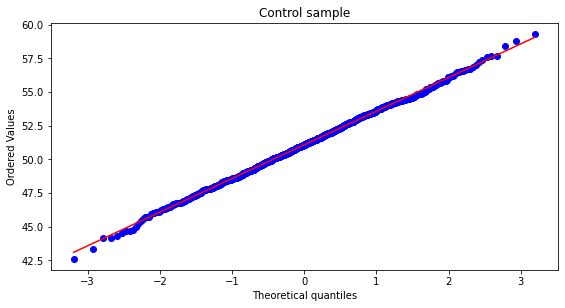

In [36]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
stats.probplot(control, dist="norm", plot=plt)
plt.title('Control sample')

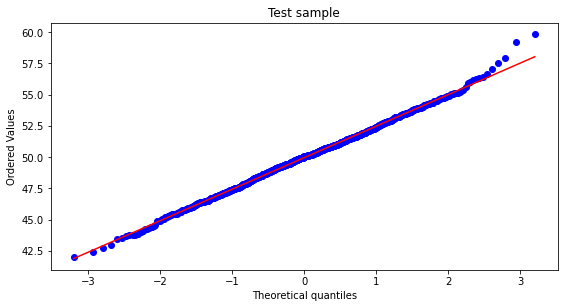

In [37]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,2)
stats.probplot(test, dist="norm", plot=plt)
plt.title('Test sample')
plt.show()

Очевидно, что выборки взяты из нормального распределения

## Проверим на z-критерий (двусторонний)

In [40]:
# z criteria
a = control.mean() - test.mean()
b = np.sqrt((control.var(ddof=1) / control.shape[0]) + (test.var(ddof=1) / test.shape[0]))
z = a/b

# p value
p = 2 * (1 - stats.norm.cdf(abs(z)))

print('p-value = ', p)
print('Z-criteria = ', round(z, 2))

p-value =  0.0
Z-criteria =  9.88


Отвергаем гипотезу :(